In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Naive Bayes Classification and Cross Validation

## Read in dataframe and show

In [2]:
df = pd.read_csv("fake_bills.csv", sep = ';')
df.dropna(inplace=True)
print(df.shape)
df.head(10)

(1463, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


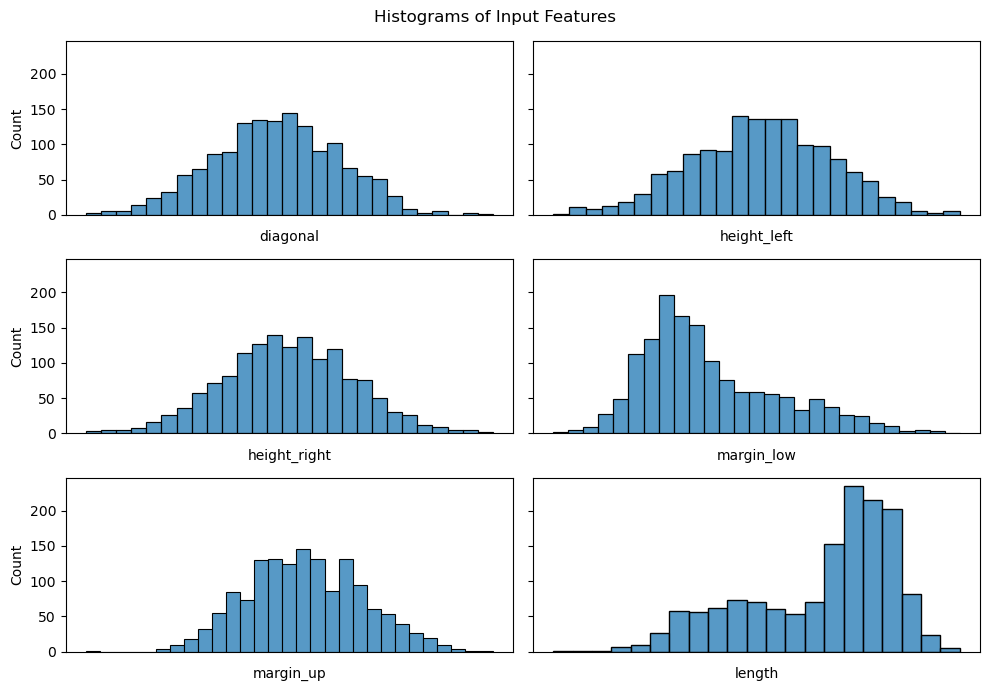

In [3]:
fig, ax = plt.subplots(3, 2, figsize = (10, 7), sharey = True )
dat = df.drop(columns = "is_genuine")
count = 0
colnames = list(dat.columns)
for row in ax:
    for col in row:
        sns.histplot(dat.loc[:, colnames[count]], ax = col)
        col.set(xticklabels = [])
        col.tick_params(bottom=False)
        count += 1
fig.suptitle("Histograms of Input Features")
plt.tight_layout()

plt.show()

All of these features seem to be normally distributed, so we can hypothesize that the Gaussian Naive Bayes Classifier will give us the most accurate results.

## Creating the Naive Bayes model from the data
First, I will split into 10 subsets so I will be able to easily use cross validation to check that the Gaussian NB is indeed the best fit for this dataset. This can be accomplished manually by splitting into 10 subsets and then iteratively finding the MSE of the 'out' set, or we can use the sklearn 'KFold' method, which is what I will use here.

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy import mean, absolute, sqrt

In [5]:
X = df.drop(columns = 'is_genuine')
y = df.is_genuine

In [6]:
#Define cross-validation split and model
cross = KFold(n_splits = 10, random_state=1, shuffle = True)

#Get cross validation score for Gaussian Model
mod = GaussianNB()
scores = cross_val_score(mod, X, y, scoring='accuracy', cv=cross)
GaussianRMSE = mean(scores)


#Get cross validation RMSE for a more complex KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
mod = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(mod, X, y, scoring='accuracy', cv=cross)
K_comRMSE = mean(scores)


#Get cross validation RMSE for a more simple KNN Classifier
mod = KNeighborsClassifier(n_neighbors = 25)
scores = cross_val_score(mod, X, y, scoring='accuracy', cv=cross)
K_simpRMSE = mean(scores)

In [49]:
print(f"NB = {GaussianRMSE}, CompKNN = {K_comRMSE}, SimpKNN = {K_simpRMSE}")

NB = 0.9911098686049762, CompKNN = 0.9904342558941386, SimpKNN = 0.989749324387289


<table>
  <thead>
    <tr>
      <th>Gaussian Naive-Bayes</th>
      <th>Simple KNN</th>
        <th>Complex KNN</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
    </tr>
    <tr>
      <td>.9911</td>
      <td>.9897</td>
        <td>.9904</td>
    </tr>
  </tbody>
</table>

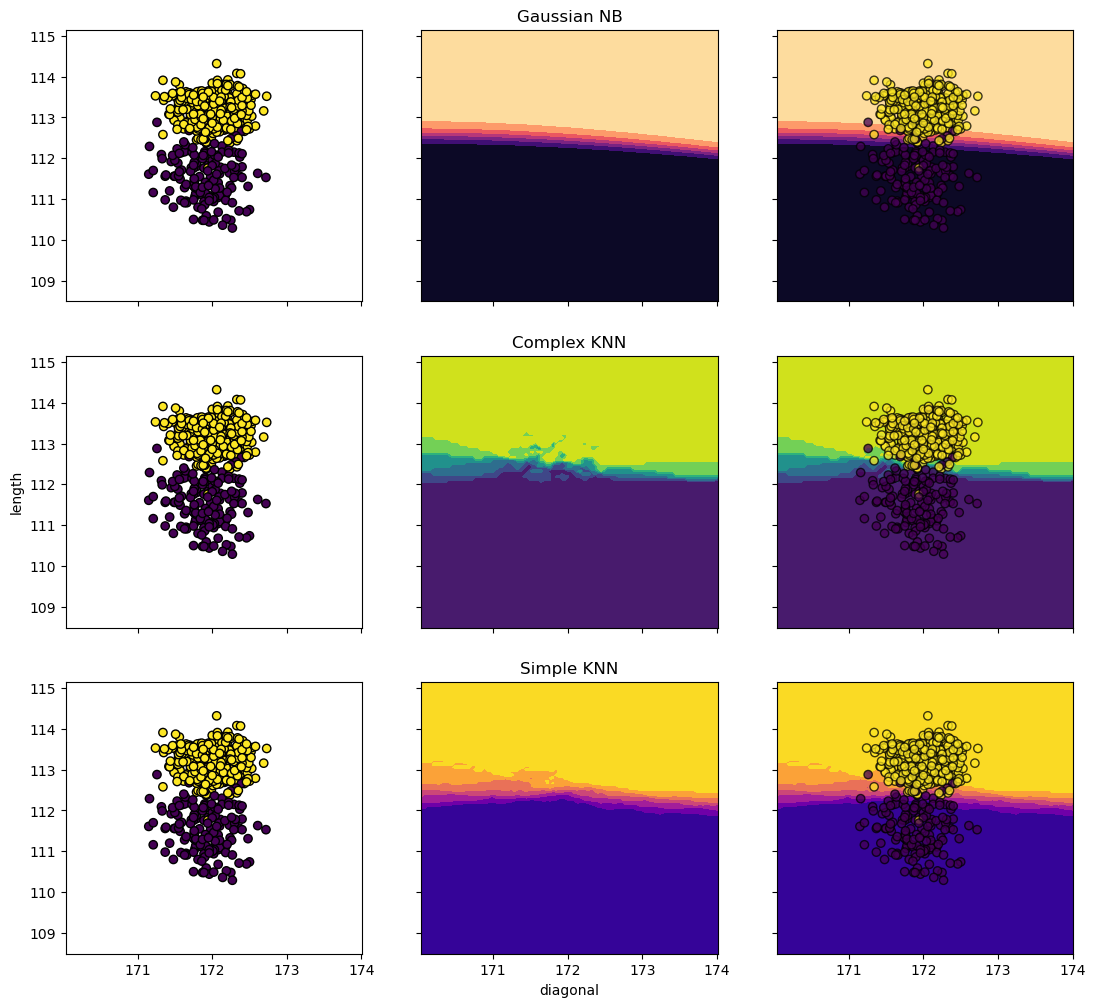

In [47]:
from sklearn.inspection import DecisionBoundaryDisplay
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns = 'is_genuine'), df.is_genuine, test_size = 1/3)
X_train_cols = xtrain[["diagonal", 'length'] ]
fig2, ax = plt.subplots(3, 3, figsize = (13, 12), sharey = True , sharex=True)


ax[0,0].scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k')
ax[1,0].scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k')
ax[1,0].set_ylabel('length')
ax[2,0].scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k')

nb = GaussianNB().fit(X_train_cols, ytrain)
boundary = DecisionBoundaryDisplay.from_estimator(nb, 
                                                  X_train_cols,
                                                  cmap=plt.cm.magma,
                                                  ax = ax[0,1], xlabel= '', ylabel = '')
boundary = DecisionBoundaryDisplay.from_estimator(nb, 
                                                  X_train_cols,
                                                  cmap=plt.cm.magma,
                                                  ax = ax[0,2], xlabel= '', ylabel = '')
ax[0,2].scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k', alpha = .75)
ax[0,1].set_title("Gaussian NB")

kn1 = KNeighborsClassifier(n_neighbors = 5).fit(X_train_cols, ytrain)
boundary2 = DecisionBoundaryDisplay.from_estimator(kn1, 
                                                  X_train_cols,
                                                  cmap=plt.cm.viridis,
                                                 ax = ax[1,1], xlabel= '', ylabel = '')
boundary2 = DecisionBoundaryDisplay.from_estimator(kn1, 
                                                  X_train_cols,
                                                  cmap=plt.cm.viridis,
                                                 ax = ax[1,2], xlabel= '', ylabel = '')
ax[1,2].scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k', alpha = .75)
#ax3.scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k') 
ax[1,1].set_title("Complex KNN")

kn2 = KNeighborsClassifier(n_neighbors=25).fit(X_train_cols, ytrain)
boundary3 = DecisionBoundaryDisplay.from_estimator(kn2, 
                                                  X_train_cols,
                                                  cmap=plt.cm.plasma,
                                                  ax= ax[2,1], ylabel = '')
boundary3 = DecisionBoundaryDisplay.from_estimator(kn2, 
                                                  X_train_cols,
                                                  cmap=plt.cm.plasma,
                                                  ax= ax[2,2], xlabel= '', ylabel = '')
ax[2,2].scatter(xtest.diagonal, xtest.length, c = ytest, ec = 'k', alpha = .75)
ax[2,1].set_title("Simple KNN")
plt.show()

# Analysis
The above plots show the model trained and plotted on the 'diagonal' and 'length' features of the dataset. While this is not as comprehensive as the 10 fold cross validation, we can see that the Complex Knn model overfits and shows areas of counterfeit detection within the acceptable size range for a valid bill. Taking into consideration the accuracy scores from the cross validation and the visual assesment of the three models, it is likely that, of the three, Gaussian Naive Bayes is the most robust strategy to get an accurate and fast classification method. 

It should also be noted that the KNN models shown in the plot are much less accurate than they are in the cross validation and that is because for the purpose of the plotting, the model can only be trained on the features plotted on the axes for which two features were arbitrarily chosen. The KNN models will get better with more input features, but overall the Gaussian NB is the most accurate still and can work well with far less features. This confirms our hypothesis based on the distribution of the features from the exploratory data analysis.